In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from notebook_utils import load_pickle
import datetime
import pandas as pd
import os

## PLEASE MAKE SURE YOU USE PYTHON 3.8 >=

In [89]:
jobs = list(filter(lambda x: x not in ['.ipynb_checkpoints', 'experiment_analysis.ipynb', '__pycache__', 'notebook_utils.py'], os.listdir()))
# job_name = jobs[4]
# print(job_name)

'''your jobs are'''
for j in jobs:
    print(j)


regular_dqn_normalized
ddqn_dense_small_mergescore
ddqn_small_dense
strategy_analysis.ipynb
ddqn_dense_normalized
player_test
testing_the_folder


In [90]:
'''choose the job that you wish to analyse'''

job_name = 'ddqn_small_dense'

In [91]:

# Load episode data, hyper parameters and runtime from saved pickle objects
episodes = load_pickle(job_name, 'episodes.p')
hyperparameters = load_pickle(job_name, 'hyperparameters.p')
runtime = load_pickle(job_name, 'runtime.p')

# Load episodes into Pandas df and convert to numpy array to facilitate plotting
# [{'max_tile': 32, 'merge_score': 376, 'number': 0, 'reward': 1, 'epsilon': 1.0, 'number_moves': 67}, ...]
# array([[ 32., 376.,   0.,   1.,   1.,  67.], ...])
episode_matrix = pd.DataFrame(episodes).values 

print(f"{job_name} ran for {datetime.timedelta(seconds=runtime)},  {len(episodes)} episodes\n")

'''Print Hyperparameters'''
print("Hyper parameters")
for key in hyperparameters:
    print(key, "=", hyperparameters[key])

ddqn_small_dense ran for 1 day, 0:05:39.420000,  9667 episodes

Hyper parameters
batch_size = 5000
discount_factor = 0.8
model = Sequential(
  (0): Linear(in_features=16, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=4, bias=True)
)
replay_buffer = 50000
learning_rate = 0.0001
loss_fn = MSELoss()
optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)
no_episodes = 50000
no_episodes_to_reach_epsilon = 1000
no_episodes_before_training = 500
no_episodes_before_updating_target = 50
min_epsilon = 0.01
use_double_dqn = True


1.0
[0.000e+00 1.000e+00 2.000e+00 ... 9.664e+03 9.665e+03 9.666e+03]


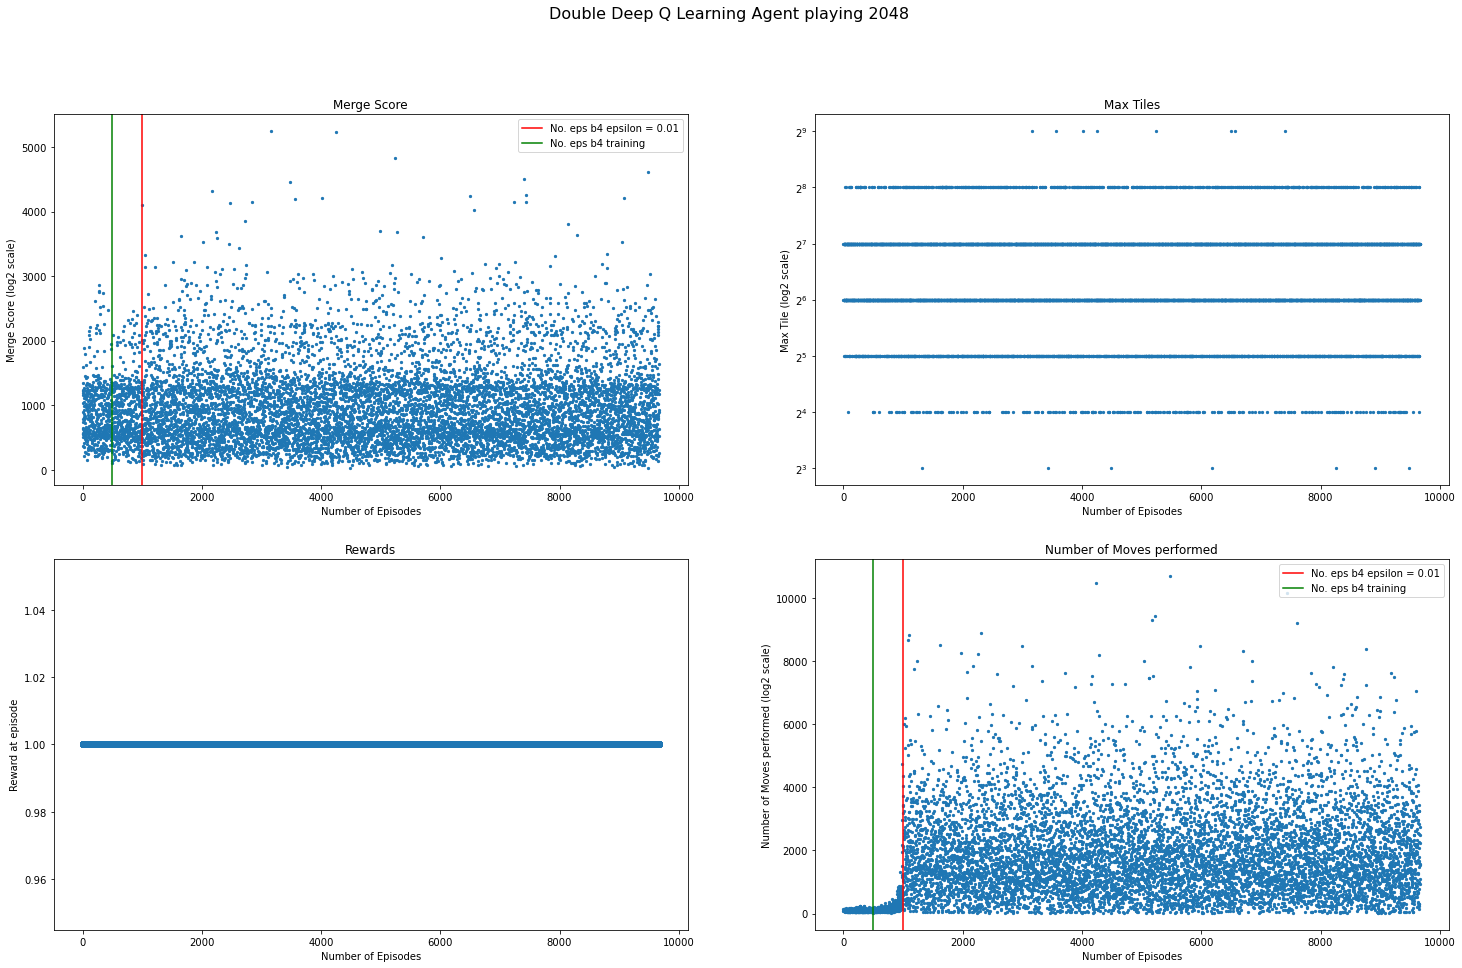

In [92]:
# [{'max_tile': 32, 'merge_score': 376, 'number': 0, 'reward': 1, 'epsilon': 1.0, 'number_moves': 67}, ...]
# array([[ 32., 376.,   0.,   1.,   1.,  67.], ...])
s = 5

max_tiles = episode_matrix.T[0]
merge_scores = episode_matrix.T[1]
iteration = episode_matrix.T[2]
rewards = episode_matrix.T[3]
print(np.max(rewards))
epsilon = episode_matrix.T[4]
number_of_moves = episode_matrix.T[5]
print(iteration)
fig = plt.figure(figsize=(25,15))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# ax1.set_yscale('log', base=2)
ax2.set_yscale('log', base=2)

title = "Deep Q Learning Agent playing 2048"
if hyperparameters['use_double_dqn']:
    title = "Double " + title
fig.suptitle(title, fontsize=16)


ax1.scatter(iteration, merge_scores, s=s)
ax1.set_title("Merge Score")
ax1.set_ylabel("Merge Score (log2 scale)")
ax1.set_xlabel("Number of Episodes")
ax1.axvline(x=hyperparameters["no_episodes_to_reach_epsilon"], c='r', label=f"No. eps b4 epsilon = {hyperparameters['min_epsilon']}")
ax1.axvline(x=hyperparameters["no_episodes_before_training"], c='g', label="No. eps b4 training")
ax1.legend()

ax2.scatter(iteration, max_tiles, s=s)
ax2.set_title("Max Tiles")
ax2.set_ylabel("Max Tile (log2 scale)")
ax2.set_xlabel("Number of Episodes")

ax3.scatter(iteration, rewards)
ax3.set_title("Rewards")
ax3.set_ylabel("Reward at episode")
ax3.set_xlabel("Number of Episodes")

ax4.scatter(iteration, number_of_moves, s=s)
ax4.set_title("Number of Moves performed")
ax4.set_ylabel("Number of Moves performed (log2 scale)")
ax4.axvline(x=hyperparameters["no_episodes_to_reach_epsilon"], c='r', label=f"No. eps b4 epsilon = {hyperparameters['min_epsilon']}")
ax4.axvline(x=hyperparameters["no_episodes_before_training"], c='g', label="No. eps b4 training")
ax4.legend()
ax4.set_xlabel("Number of Episodes")

plt.show()

array([[   8,   16,   32,   64,  128,  256,  512],
       [   7,  241, 1445, 3597, 3701,  668,    8]])

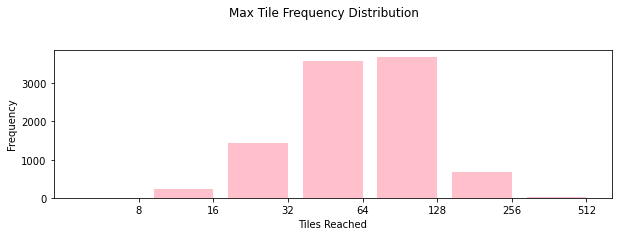

In [93]:
def get_max_tile_frequency(max_tiles_array):
    max_tile_frequency = np.array(np.unique(max_tiles_array, return_counts=True), dtype=int)
    return max_tile_frequency

def plot_max_tile_distribution(max_tile_frequency, ax, include_labels=True):
    barwidth= 0.8
    ax.bar(np.arange(len(max_tile_frequency[0])) , max_tile_frequency[1], barwidth, color="pink")
    ax.set_xticks(np.arange(len(max_tile_frequency[1]))+barwidth/2.)
    ax.set_xticklabels(max_tile_frequency[0])
    if include_labels:
        ax.set_xlabel("Tiles Reached")
        ax.set_ylabel("Frequency")

fig = plt.figure(figsize=(10,6))
fig.suptitle("Max Tile Frequency Distribution")
base_ax = fig.add_subplot(211)


max_tile_frequency = get_max_tile_frequency(max_tiles[:])

plot_max_tile_distribution(max_tile_frequency, base_ax)
max_tile_frequency

# Analysis of trained agents playing the game

#### Below are the models which have had an agent play the game

In [94]:
played_models = [exp for exp in jobs if os.path.isfile(os.path.join(exp,'binary/games_played.p'))]
played_models
        

['player_test']

In [95]:
example_agent = played_models[0]

with open(os.path.join(example_agent,'binary/games_played.p'), mode='rb') as f:
    history = pickle.load(f)

    
print(f'This agent has played {len(history)} times')

This agent has played 200 times
